Epoch 1/15
5188/5188 - 8s - loss: 3.4990e-04 - 8s/epoch - 1ms/step
Epoch 2/15
5188/5188 - 6s - loss: 1.4279e-05 - 6s/epoch - 1ms/step
Epoch 3/15
5188/5188 - 6s - loss: 1.3771e-05 - 6s/epoch - 1ms/step
Epoch 4/15
5188/5188 - 6s - loss: 1.3443e-05 - 6s/epoch - 1ms/step
Epoch 5/15
5188/5188 - 6s - loss: 1.3258e-05 - 6s/epoch - 1ms/step
Epoch 6/15
5188/5188 - 7s - loss: 1.3296e-05 - 7s/epoch - 1ms/step
Epoch 7/15
5188/5188 - 6s - loss: 1.2855e-05 - 6s/epoch - 1ms/step
Epoch 8/15
5188/5188 - 6s - loss: 1.3269e-05 - 6s/epoch - 1ms/step
Epoch 9/15
5188/5188 - 6s - loss: 1.2759e-05 - 6s/epoch - 1ms/step
Epoch 10/15
5188/5188 - 6s - loss: 1.2348e-05 - 6s/epoch - 1ms/step
Epoch 11/15
5188/5188 - 6s - loss: 1.2128e-05 - 6s/epoch - 1ms/step
Epoch 12/15
5188/5188 - 6s - loss: 1.2120e-05 - 6s/epoch - 1ms/step
Epoch 13/15
5188/5188 - 6s - loss: 1.1985e-05 - 6s/epoch - 1ms/step
Epoch 14/15
5188/5188 - 6s - loss: 1.2441e-05 - 6s/epoch - 1ms/step
Epoch 15/15
5188/5188 - 6s - loss: 1.1715e-05 - 6s/epoch 

C:\Users\ASUS\anaconda3\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


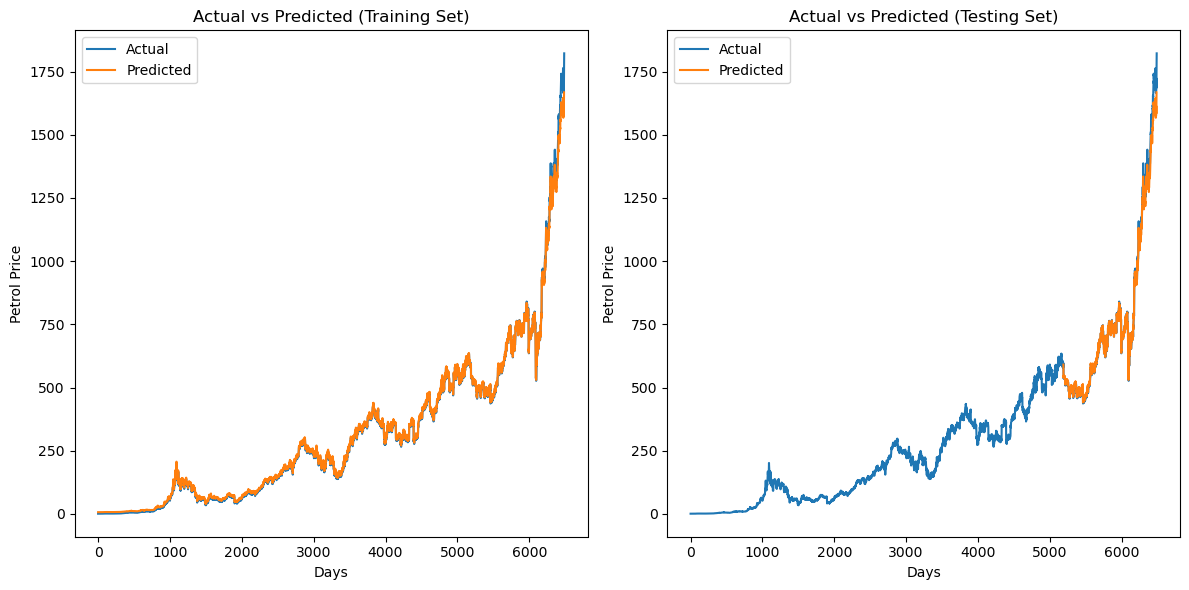

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,r2_score
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Assuming your dataset is in a CSV file
data = pd.read_csv('INFY.NS.csv')
data = data.dropna()

# Assuming your dataset has columns: date, open, close, volume
# You may need to preprocess your data accordingly (e.g., convert date to datetime, handle missing values)

# Using 'close' as the target variable
dataset = data['Close'].values.reshape(-1, 1)

# Normalizing the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset_scaled = scaler.fit_transform(dataset)

# Splitting the dataset into training and testing sets (80:20 ratio)
train_size = int(len(dataset_scaled) * 0.8)
test_size = len(dataset_scaled) - train_size
train, test = dataset_scaled[0:train_size, :], dataset_scaled[train_size:len(dataset_scaled), :]

# Function to create sequences for LSTM
def create_sequences(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

# Creating sequences with a look-back of 1
look_back = 1
X_train, y_train = create_sequences(train, look_back)
X_test, y_test = create_sequences(test, look_back)

# Reshaping the input data to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Building the LSTM model
model = Sequential()
model.add(LSTM(units=50, input_shape=(1, look_back)))
model.add(Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Training the model
model.fit(X_train, y_train, epochs=15, batch_size=1, verbose=2)

# Predicting on training and testing sets
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Transforming back to original scale
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])


# Calculating RMSE
rmse_train = np.sqrt(mean_squared_error(y_train[0], train_predict[:, 0]))
rmse_test = np.sqrt(mean_squared_error(y_test[0], test_predict[:, 0]))

# Calculating R2 Score
r2_train = r2_score(y_train[0], train_predict[:, 0])
r2_test = r2_score(y_test[0], test_predict[:, 0])

print(f"RMSE on Training Set: {rmse_train}")
print(f"RMSE on Test Set: {rmse_test}")
print(f"R2 Score on Training Set: {r2_train}")
print(f"R2 Score on Test Set: {r2_test}")

# Plotting the actual vs predicted values for training set
# Plotting the actual vs predicted values for training set
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(scaler.inverse_transform(dataset_scaled), label='Actual')
plt.plot(np.concatenate([train_predict, test_predict]), label='Predicted')
plt.title('Actual vs Predicted (Training Set)')
plt.xlabel('Days')
plt.ylabel('Petrol Price')
plt.legend(loc='upper left')
# Plotting the actual vs predicted values for testing set
plt.subplot(1, 2, 2)
plt.plot(scaler.inverse_transform(dataset_scaled), label='Actual')
plt.plot([None for _ in train_predict] + [x for x in test_predict], label='Predicted')
plt.title('Actual vs Predicted (Testing Set)')
plt.xlabel('Days')
plt.ylabel('Petrol Price')

plt.legend(loc='upper left')  # This will add the legend to your plots
plt.tight_layout()
plt.show()


C:\Users\ASUS\anaconda3\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


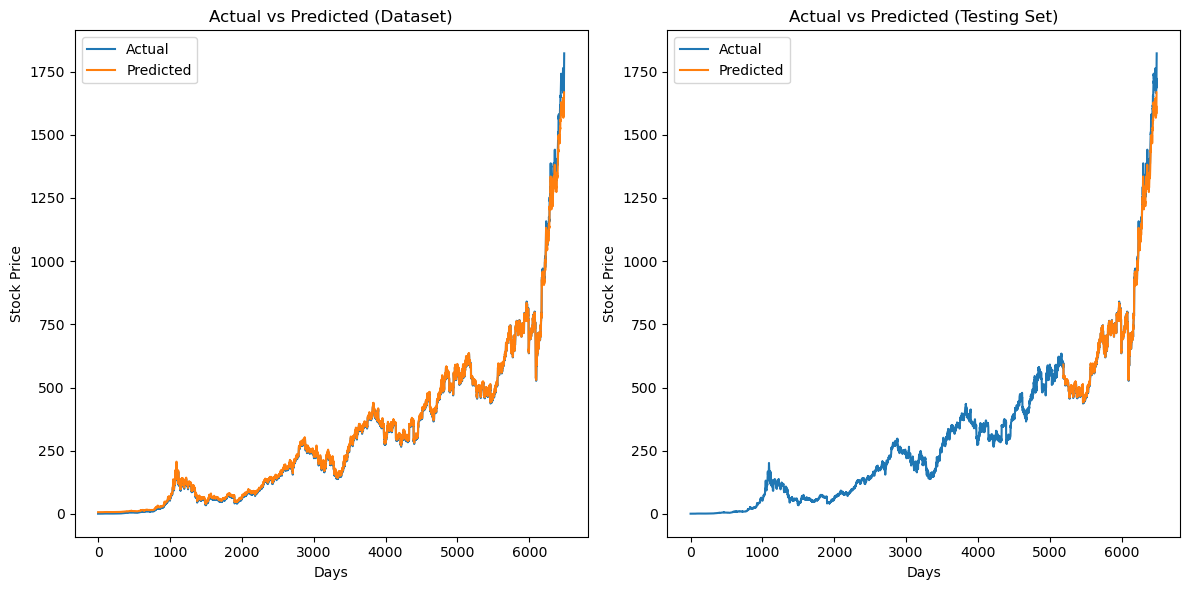

In [2]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(scaler.inverse_transform(dataset_scaled), label='Actual')
plt.plot(np.concatenate([train_predict, test_predict]), label='Predicted')
plt.title('Actual vs Predicted (Dataset)')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.legend(loc='upper left')
# Plotting the actual vs predicted values for testing set
plt.subplot(1, 2, 2)
plt.plot(scaler.inverse_transform(dataset_scaled), label='Actual')
plt.plot([None for _ in train_predict] + [x for x in test_predict], label='Predicted')
plt.title('Actual vs Predicted (Testing Set)')
plt.xlabel('Days')
plt.ylabel('Stock Price')

plt.legend(loc='upper left')  # This will add the legend to your plots
plt.tight_layout()
plt.show()

In [3]:
# Calculate the mean of the 'rate' column
mean_rate = data['Close'].mean()
print(f"Mean: {mean_rate}")

# Calculate the correlation between the actual and predicted values
# Note: You need to ensure that the actual and predicted values are of the same length
correlation = np.corrcoef(y_test[0][-len(test_predict):], test_predict[:, 0])[0, 1]
print(f"Correlation between Actual and Predicted Values: {correlation}")

Mean: 315.92898955064
Correlation between Actual and Predicted Values: 0.9987785439143273
